# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [12]:
# Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import normaltest
from scipy.stats import shapiro
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [13]:
#your code here
wnba=pd.read_csv('../data/wnba_clean.csv',index_col=[0])
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

Considering that my population is all the female basketball players in the world, the WNBA players are my sample. To find the average weight of a professional female basketball player, I could calculate a range for the average mean of the population's weight.

Since the sample has more than 30 elements, I consider that this sample fullfills the requirements necessary to be used to infer average height.

I will use the confidence interval to calculate range of average wheight. However there some other techniques that could be used:
* We could have selected a sample of each league in a world, and build a confidence interval for multiple samples;
* We could perform an hypothesis test where H0:Average weight=67


**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [14]:
# your code here
import math
from scipy.stats import norm

wheights = wnba['Weight']
wheights=np.array(wheights)
mean=np.mean(wheights) 
sigma=np.std(wheights)
ci=norm.interval(0.95, loc=mean,scale=sigma)
ci

(57.50291420081216, 100.45483227806109)

**What can you say about these results?**

I can say with 95% confidence that the average weight of the population goes from 57.5 to 100.45.

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

I would say that my sister's weight is inside the world's average range on female professional basketball players and that she could play in a professional league.

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

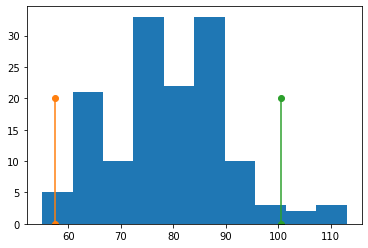

In [15]:
# your code here

plt.hist(wnba['Weight'])

one_x12, one_y12 = [ci[0],ci[0]], [0, 20]
two_x12, two_y12 = [ci[1],ci[1]], [0, 20]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

I believe that this sample fullfills all the requirements. The sample contains every player on the WNBA without any kind of selective measure. However, there could be players with a 0.00% from the FT line that never got to attempt one free throw. That said, I'm only going to consider players that have an FTA>0.

To estimate the percentage of players that fail more than 40% of their FT's I will calculate a confidence interval for the proportion.

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [16]:
# your code here
df=wnba[(wnba['FTA']>0) & (wnba['FT%']<=60)]
p=len(df)/len(wnba)
n=len(wnba)
std_1=np.sqrt(p*(1-p)/n)

conf1=norm.interval(0.95,loc=p,scale=std_1)
conf1

(0.02330628576860741, 0.10345427761167428)

**What can you comment about our result? What would you tell your sister?**

The percentage of the population that makes less than 60% of FT's is between 2.33% and 10.34%. So, I would tell my sister that she is not right. In the worst situation, only 10% of the female professional basketball players fail more than 40% of FT's.



# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

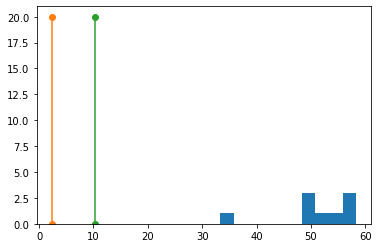

In [27]:
#your code here
plt.hist(df['FT%'])

one_x12, one_y12 = [conf1[0]*100,conf1[0]*100], [0, 20]
two_x12, two_y12 = [conf1[1]*100,conf1[1]*100], [0, 20]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

I would use a one sample hypothesis test.
I consider that the sample fullfills the requirements and there's no need for assumptions.

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [18]:
#your code here
from scipy.stats import ttest_1samp

"""
H0:Average Assists=52
H1:Average Assists!=52

alpha=0.05
"""

ttest_1samp(wnba['AST'], 52)

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

Since pvalue is lower than alpha, we should reject H0.

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [19]:
#your-answer-here

"""
H0: Average Assists=52
H1: Average Assists<52

alpha=0.05
 
With symmetric distributions one-sided p-value is just half of the two-sided pvalue. 
This means that given p and t values from a two-tailed test, I would reject the null hypothesis of a greater-than test 
when a less-than test when p/2 < alpha and t < 0.

"""
p=ttest_1samp(wnba['AST'], 52)[1]
sta=ttest_1samp(wnba['AST'], 52)[0]

(sta,p/2)

(-2.1499947192482898, 0.016630770677053583)

Since pvalue is below alpha and statistic is negative, we reject H0.

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [20]:
#your code here


# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

I would use the Shpairo-Wilk test. The Shapiro-Wilk tests if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed. If the p value returned is less than .05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population.

Reference:https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9


In [21]:
# your code here

"""
H0:Distribution=Normal distribution
H1:Distribution != Normal distribution

alpha=0.05

"""

shapiro(wnba["Weight"])

(0.9781054854393005, 0.022327149286866188)

**What are your comments in regards to the results of the test?**

Since our pvalue is below alpha, there is evidence that the data is not from a normally distributed population.